In [1]:
from opensoundscape.preprocess.preprocessors import BasePreprocessor,  CnnPreprocessor
import torch
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
from opensoundscape.torch.models import cnn
from opensoundscape.torch.architectures import cnn_architectures

In [2]:
import opensoundscape
opensoundscape.__version__


'0.6.2'

In [3]:
df = pd.read_csv('screaming_pyha_test.csv')
ef = pd.read_csv('flycatcher_test.csv')
ff = pd.read_csv('antbird_test.csv')
gf = pd.read_csv('attila_test.csv')
hf = pd.read_csv('peppershrike_test.csv')
jf = pd.read_csv('none_test.csv')
print(df.shape)
print(ef.shape)
print(ff.shape)
print(gf.shape)
print(hf.shape)
print(jf.shape)

(199, 6)
(1348, 6)
(1106, 6)
(163, 6)
(37, 6)
(1017, 6)


In [4]:
df = df.append(ef, ignore_index=True)
df = df.append(ff, ignore_index=True)
df = df.append(gf, ignore_index=True)
df = df.append(hf, ignore_index=True)
df = df.append(jf, ignore_index=True)
df.shape

(3870, 6)

In [5]:
# ff.drop('Unnamed: 0', inplace=True)
df.head()

,Unnamed: 0,file,start_time,end_time,SAMPLING RATE,MANUAL ID
0,0,./temp_clips/../PyHa_TEST_Piha_Audio/TEST/Scre...,0.0,3.0,16000,bird
1,1,./temp_clips/../PyHa_TEST_Piha_Audio/TEST/Scre...,3.0,6.0,16000,bird
2,2,./temp_clips/../PyHa_TEST_Piha_Audio/TEST/Scre...,6.0,9.0,16000,bird
3,3,./temp_clips/../PyHa_TEST_Piha_Audio/TEST/Scre...,9.0,12.0,16000,bird
4,4,./temp_clips/../PyHa_TEST_Piha_Audio/TEST/Scre...,12.0,15.0,16000,bird


In [6]:
df.loc[df['MANUAL ID'].str.contains('Flycatcher'), 'MANUAL ID'] = 'Flycatcher'
df.loc[df['MANUAL ID'].str.contains('Antbird'), 'MANUAL ID'] = 'Antbird'
df.loc[df['MANUAL ID'].str.contains('Peppershrike'), 'MANUAL ID'] = 'Peppershrike'
df.loc[df['MANUAL ID'].str.contains('Attila'), 'MANUAL ID'] = 'Attila'
df.loc[df['MANUAL ID'].str.contains('None'), 'MANUAL ID'] = 'None'
df['MANUAL ID'] = df['MANUAL ID'].map({'bird': 'Piha', 'Flycatcher': 'Flycatcher', 'Antbird': 'Antbird', 'Peppershrike': 'Peppershrike', 'Attila': 'Attila', 'None' : 'None'})
df['MANUAL ID'].value_counts()

Flycatcher      1348
Antbird         1106
None            1017
Piha             199
Attila           163
Peppershrike      37
Name: MANUAL ID, dtype: int64

In [7]:
from opensoundscape.annotations import categorical_to_one_hot
one_hot_labels, classes = categorical_to_one_hot(df[['MANUAL ID']].values)
labelFfOpSo = pd.DataFrame(index=df['file'],data=one_hot_labels,columns=classes)

In [8]:
classes

['Peppershrike', 'Attila', 'Flycatcher', 'Piha', 'None', 'Antbird']

In [9]:
# reference - http://opensoundscape.org/en/latest/api/modules.html?highlight=multiclass#opensoundscape.torch.models.cnn.Resnet18Multiclass

# http://opensoundscape.org/en/latest/api/modules.html?highlight=multiclass#opensoundscape.metrics.multiclass_metrics

In [10]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(labelFfOpSo, test_size=0.05, random_state=42)
train_df, test_df = train_test_split(train_df, test_size=0.1, random_state=42)

In [11]:
train_df

,Peppershrike,Attila,Flycatcher,Piha,None,Antbird
file,,,,,,
./temp_clips/../Absent/5D1B1608_4.WAV,0,0,0,0,1,0
./temp_clips/../Labeling System xeno-canto Dataset/Mixed_Bird/Myiarchus-cephalotes-250243_24.0s_26.644897959183673s.wav,0,0,1,0,0,0
./temp_clips/../Absent/5D1524F0_19.WAV,0,0,0,0,1,0
./temp_clips/../Labeling System xeno-canto Dataset/Mixed_Bird/Myiarchus-tyrannulus-264733_45.0s_48.0s.wav,0,0,1,0,0,0
./temp_clips/../Labeling System xeno-canto Dataset/Mixed_Bird/Myiarchus-ferox-443445_6.0s_9.0s.wav,0,0,1,0,0,0
...,...,...,...,...,...,...
./temp_clips/../Labeling System xeno-canto Dataset/Mixed_Bird/Onychorhynchus-coronatus-464814_24.0s_27.0s.wav,0,0,1,0,0,0
./temp_clips/../Labeling System xeno-canto Dataset/Mixed_Bird/Myiarchus-ferox-432371_27.0s_28.02938775510204s.wav,0,0,1,0,0,0
./temp_clips/../Labeling System xeno-canto Dataset/Mixed_Bird/Myiozetetes-granadensis-74718_9.0s_12.0s.wav,0,0,1,0,0,0


In [12]:
print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

(3308, 6)
(194, 6)
(368, 6)


In [13]:
train_dataset = CnnPreprocessor(df=train_df)
train_dataset.augmentation_on()
train_dataset.actions.load_audio.set(sample_rate=44100)
valid_dataset = CnnPreprocessor(df=valid_df)
valid_dataset.augmentation_on()
valid_dataset.actions.load_audio.set(sample_rate=44100)

In [14]:
model = cnn.Resnet18Multiclass(classes)

created PytorchModel model object with 6 classes


In [15]:
model.train(
    train_dataset=train_dataset,
    valid_dataset=valid_dataset,
    save_path='./multilabel_train_five_classes_aug_on/',
    epochs=20,
    batch_size=32,
    save_interval=100,
    num_workers=2
)

Epoch: 0 [batch 0/104 (0.00%)] 
	Jacc: 0.169 Hamm: 0.828 DistLoss: 30.940
Epoch: 0 [batch 10/104 (9.62%)] 
	Jacc: 0.076 Hamm: 0.182 DistLoss: 20.658


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 20/104 (19.23%)] 
	Jacc: 0.244 Hamm: 0.120 DistLoss: 18.680


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 30/104 (28.85%)] 
	Jacc: 0.183 Hamm: 0.146 DistLoss: 16.397


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 40/104 (38.46%)] 
	Jacc: 0.312 Hamm: 0.089 DistLoss: 15.209


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 50/104 (48.08%)] 
	Jacc: 0.273 Hamm: 0.099 DistLoss: 14.592
Epoch: 0 [batch 60/104 (57.69%)] 
	Jacc: 0.238 Hamm: 0.135 DistLoss: 13.875


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 70/104 (67.31%)] 
	Jacc: 0.273 Hamm: 0.115 DistLoss: 13.147


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 80/104 (76.92%)] 
	Jacc: 0.284 Hamm: 0.115 DistLoss: 12.714


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 90/104 (86.54%)] 
	Jacc: 0.369 Hamm: 0.062 DistLoss: 12.224


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 100/104 (96.15%)] 
	Jacc: 0.460 Hamm: 0.089 DistLoss: 11.779


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.6396324803497799
	 Recall: 0.47221426194883187
	 F1: 0.5069832756622653
Updating best model


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 0/104 (0.00%)] 
	Jacc: 0.379 Hamm: 0.099 DistLoss: 7.840


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 10/104 (9.62%)] 
	Jacc: 0.368 Hamm: 0.052 DistLoss: 6.811


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 20/104 (19.23%)] 
	Jacc: 0.443 Hamm: 0.078 DistLoss: 7.357


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 30/104 (28.85%)] 
	Jacc: 0.351 Hamm: 0.089 DistLoss: 7.582


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 40/104 (38.46%)] 
	Jacc: 0.435 Hamm: 0.062 DistLoss: 7.411


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 50/104 (48.08%)] 
	Jacc: 0.506 Hamm: 0.042 DistLoss: 7.248


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 60/104 (57.69%)] 
	Jacc: 0.286 Hamm: 0.104 DistLoss: 7.184


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 70/104 (67.31%)] 
	Jacc: 0.532 Hamm: 0.073 DistLoss: 7.153
Epoch: 1 [batch 80/104 (76.92%)] 
	Jacc: 0.554 Hamm: 0.036 DistLoss: 7.007


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 90/104 (86.54%)] 
	Jacc: 0.356 Hamm: 0.068 DistLoss: 6.845


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 100/104 (96.15%)] 
	Jacc: 0.556 Hamm: 0.052 DistLoss: 6.740


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.6395012626262626
	 Recall: 0.656833184899433
	 F1: 0.6302071058483097
Updating best model


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 0/104 (0.00%)] 
	Jacc: 0.657 Hamm: 0.042 DistLoss: 3.289


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 10/104 (9.62%)] 
	Jacc: 0.704 Hamm: 0.031 DistLoss: 5.000
Epoch: 2 [batch 20/104 (19.23%)] 
	Jacc: 0.523 Hamm: 0.073 DistLoss: 5.440


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 30/104 (28.85%)] 
	Jacc: 0.514 Hamm: 0.042 DistLoss: 5.605


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 40/104 (38.46%)] 
	Jacc: 0.636 Hamm: 0.052 DistLoss: 5.579
Epoch: 2 [batch 50/104 (48.08%)] 
	Jacc: 0.711 Hamm: 0.042 DistLoss: 5.717


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 60/104 (57.69%)] 
	Jacc: 0.360 Hamm: 0.073 DistLoss: 5.660


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 70/104 (67.31%)] 
	Jacc: 0.717 Hamm: 0.026 DistLoss: 5.618
Epoch: 2 [batch 80/104 (76.92%)] 
	Jacc: 0.375 Hamm: 0.068 DistLoss: 5.467


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 90/104 (86.54%)] 
	Jacc: 0.511 Hamm: 0.068 DistLoss: 5.449


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 100/104 (96.15%)] 
	Jacc: 0.515 Hamm: 0.047 DistLoss: 5.462


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.6974389755902362
	 Recall: 0.6172896676574322
	 F1: 0.643870073281838
Updating best model


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 0/104 (0.00%)] 
	Jacc: 0.444 Hamm: 0.057 DistLoss: 4.916


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 10/104 (9.62%)] 
	Jacc: 0.727 Hamm: 0.042 DistLoss: 4.789
Epoch: 3 [batch 20/104 (19.23%)] 
	Jacc: 0.725 Hamm: 0.047 DistLoss: 4.722


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 30/104 (28.85%)] 
	Jacc: 0.643 Hamm: 0.052 DistLoss: 4.663


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 40/104 (38.46%)] 
	Jacc: 0.572 Hamm: 0.057 DistLoss: 4.820


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 50/104 (48.08%)] 
	Jacc: 0.588 Hamm: 0.031 DistLoss: 4.747


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 60/104 (57.69%)] 
	Jacc: 0.529 Hamm: 0.068 DistLoss: 4.643


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 70/104 (67.31%)] 
	Jacc: 0.342 Hamm: 0.062 DistLoss: 4.623


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 80/104 (76.92%)] 
	Jacc: 0.402 Hamm: 0.036 DistLoss: 4.549


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 90/104 (86.54%)] 
	Jacc: 0.655 Hamm: 0.031 DistLoss: 4.511


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 100/104 (96.15%)] 
	Jacc: 0.793 Hamm: 0.016 DistLoss: 4.444


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.7341387662341324
	 Recall: 0.7242824575563201
	 F1: 0.717815063176035
Updating best model


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 0/104 (0.00%)] 
	Jacc: 0.540 Hamm: 0.052 DistLoss: 4.660


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 10/104 (9.62%)] 
	Jacc: 0.388 Hamm: 0.047 DistLoss: 3.552


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 20/104 (19.23%)] 
	Jacc: 0.663 Hamm: 0.068 DistLoss: 3.902
Epoch: 4 [batch 30/104 (28.85%)] 
	Jacc: 0.539 Hamm: 0.021 DistLoss: 3.759


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 40/104 (38.46%)] 
	Jacc: 0.676 Hamm: 0.052 DistLoss: 3.532


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 50/104 (48.08%)] 
	Jacc: 0.691 Hamm: 0.026 DistLoss: 3.458


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 60/104 (57.69%)] 
	Jacc: 0.789 Hamm: 0.016 DistLoss: 3.420


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 70/104 (67.31%)] 
	Jacc: 0.742 Hamm: 0.031 DistLoss: 3.549


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 80/104 (76.92%)] 
	Jacc: 0.461 Hamm: 0.021 DistLoss: 3.479


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 90/104 (86.54%)] 
	Jacc: 0.702 Hamm: 0.052 DistLoss: 3.487
Epoch: 4 [batch 100/104 (96.15%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 3.475


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.7851398601398601
	 Recall: 0.700336485795897
	 F1: 0.7355639275854218
Updating best model
Epoch: 5 [batch 0/104 (0.00%)] 
	Jacc: 0.586 Hamm: 0.026 DistLoss: 2.584


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 10/104 (9.62%)] 
	Jacc: 0.678 Hamm: 0.026 DistLoss: 3.293


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 20/104 (19.23%)] 
	Jacc: 0.693 Hamm: 0.026 DistLoss: 3.501


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 30/104 (28.85%)] 
	Jacc: 0.617 Hamm: 0.047 DistLoss: 3.514


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 40/104 (38.46%)] 
	Jacc: 0.697 Hamm: 0.052 DistLoss: 3.446


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 50/104 (48.08%)] 
	Jacc: 0.683 Hamm: 0.042 DistLoss: 3.598
Epoch: 5 [batch 60/104 (57.69%)] 
	Jacc: 0.787 Hamm: 0.016 DistLoss: 3.502


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 70/104 (67.31%)] 
	Jacc: 0.622 Hamm: 0.016 DistLoss: 3.494


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 80/104 (76.92%)] 
	Jacc: 0.670 Hamm: 0.047 DistLoss: 3.527


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 90/104 (86.54%)] 
	Jacc: 0.777 Hamm: 0.016 DistLoss: 3.669


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 100/104 (96.15%)] 
	Jacc: 0.861 Hamm: 0.052 DistLoss: 3.651

Validation.
(194, 6)
	 Precision: 0.7697099289401499
	 Recall: 0.6715816891998871
	 F1: 0.7124135581672628


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 0/104 (0.00%)] 
	Jacc: 0.742 Hamm: 0.031 DistLoss: 2.546


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 10/104 (9.62%)] 
	Jacc: 0.803 Hamm: 0.021 DistLoss: 2.904
Epoch: 6 [batch 20/104 (19.23%)] 
	Jacc: 0.640 Hamm: 0.016 DistLoss: 2.854


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 30/104 (28.85%)] 
	Jacc: 0.948 Hamm: 0.021 DistLoss: 2.787
Epoch: 6 [batch 40/104 (38.46%)] 
	Jacc: 0.771 Hamm: 0.026 DistLoss: 2.716


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 50/104 (48.08%)] 
	Jacc: 0.597 Hamm: 0.021 DistLoss: 2.570


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 60/104 (57.69%)] 
	Jacc: 0.877 Hamm: 0.016 DistLoss: 2.546
Epoch: 6 [batch 70/104 (67.31%)] 
	Jacc: 0.646 Hamm: 0.042 DistLoss: 2.705


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 80/104 (76.92%)] 
	Jacc: 0.911 Hamm: 0.016 DistLoss: 2.671
Epoch: 6 [batch 90/104 (86.54%)] 
	Jacc: 0.586 Hamm: 0.031 DistLoss: 2.751


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 100/104 (96.15%)] 
	Jacc: 0.579 Hamm: 0.031 DistLoss: 2.752


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.7767128690556682
	 Recall: 0.7144082575637959
	 F1: 0.7411864634371028
Updating best model


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 0/104 (0.00%)] 
	Jacc: 0.568 Hamm: 0.031 DistLoss: 3.028


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 10/104 (9.62%)] 
	Jacc: 0.653 Hamm: 0.005 DistLoss: 2.235


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 20/104 (19.23%)] 
	Jacc: 0.742 Hamm: 0.031 DistLoss: 2.292


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 30/104 (28.85%)] 
	Jacc: 0.536 Hamm: 0.036 DistLoss: 2.652


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 40/104 (38.46%)] 
	Jacc: 0.430 Hamm: 0.068 DistLoss: 2.635


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 50/104 (48.08%)] 
	Jacc: 0.465 Hamm: 0.042 DistLoss: 2.613


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 60/104 (57.69%)] 
	Jacc: 0.521 Hamm: 0.036 DistLoss: 2.577


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 70/104 (67.31%)] 
	Jacc: 0.747 Hamm: 0.016 DistLoss: 2.577


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 80/104 (76.92%)] 
	Jacc: 0.985 Hamm: 0.005 DistLoss: 2.579
Epoch: 7 [batch 90/104 (86.54%)] 
	Jacc: 0.692 Hamm: 0.026 DistLoss: 2.565


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 100/104 (96.15%)] 
	Jacc: 0.589 Hamm: 0.031 DistLoss: 2.488


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.738685288930387
	 Recall: 0.7747982978446007
	 F1: 0.7500607799280367
Updating best model


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 0/104 (0.00%)] 
	Jacc: 0.588 Hamm: 0.031 DistLoss: 3.456


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 10/104 (9.62%)] 
	Jacc: 0.656 Hamm: 0.005 DistLoss: 2.597


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 20/104 (19.23%)] 
	Jacc: 0.764 Hamm: 0.026 DistLoss: 2.703


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 30/104 (28.85%)] 
	Jacc: 0.707 Hamm: 0.021 DistLoss: 2.660


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 40/104 (38.46%)] 
	Jacc: 0.635 Hamm: 0.010 DistLoss: 2.645


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 50/104 (48.08%)] 
	Jacc: 0.726 Hamm: 0.031 DistLoss: 2.475


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 60/104 (57.69%)] 
	Jacc: 0.628 Hamm: 0.016 DistLoss: 2.478


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 70/104 (67.31%)] 
	Jacc: 0.624 Hamm: 0.047 DistLoss: 2.473


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 80/104 (76.92%)] 
	Jacc: 0.853 Hamm: 0.036 DistLoss: 2.350
Epoch: 8 [batch 90/104 (86.54%)] 
	Jacc: 0.533 Hamm: 0.052 DistLoss: 2.350


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 100/104 (96.15%)] 
	Jacc: 0.629 Hamm: 0.016 DistLoss: 2.316


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.7583767258209448
	 Recall: 0.7446003480078515
	 F1: 0.747087912087912


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 0/104 (0.00%)] 
	Jacc: 0.971 Hamm: 0.010 DistLoss: 1.148
Epoch: 9 [batch 10/104 (9.62%)] 
	Jacc: 0.789 Hamm: 0.016 DistLoss: 1.474


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 20/104 (19.23%)] 
	Jacc: 0.676 Hamm: 0.031 DistLoss: 1.846


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 30/104 (28.85%)] 
	Jacc: 0.714 Hamm: 0.036 DistLoss: 1.856


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 40/104 (38.46%)] 
	Jacc: 0.889 Hamm: 0.036 DistLoss: 1.975
Epoch: 9 [batch 50/104 (48.08%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.965


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 60/104 (57.69%)] 
	Jacc: 0.958 Hamm: 0.016 DistLoss: 1.954
Epoch: 9 [batch 70/104 (67.31%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.942


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 80/104 (76.92%)] 
	Jacc: 0.791 Hamm: 0.016 DistLoss: 1.921


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 90/104 (86.54%)] 
	Jacc: 0.553 Hamm: 0.031 DistLoss: 1.938


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 100/104 (96.15%)] 
	Jacc: 0.615 Hamm: 0.021 DistLoss: 1.951


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.787531048186786
	 Recall: 0.7268416702715594
	 F1: 0.7546092796092796
Updating best model
Epoch: 10 [batch 0/104 (0.00%)] 
	Jacc: 0.500 Hamm: 0.005 DistLoss: 0.980


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 10 [batch 10/104 (9.62%)] 
	Jacc: 0.780 Hamm: 0.021 DistLoss: 2.282
Epoch: 10 [batch 20/104 (19.23%)] 
	Jacc: 0.979 Hamm: 0.005 DistLoss: 2.098
Epoch: 10 [batch 30/104 (28.85%)] 
	Jacc: 0.856 Hamm: 0.016 DistLoss: 2.025
Epoch: 10 [batch 40/104 (38.46%)] 
	Jacc: 0.553 Hamm: 0.021 DistLoss: 1.875


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 10 [batch 50/104 (48.08%)] 
	Jacc: 0.806 Hamm: 0.005 DistLoss: 1.791


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 10 [batch 60/104 (57.69%)] 
	Jacc: 0.619 Hamm: 0.016 DistLoss: 1.684


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 10 [batch 70/104 (67.31%)] 
	Jacc: 0.768 Hamm: 0.021 DistLoss: 1.731


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 10 [batch 80/104 (76.92%)] 
	Jacc: 0.821 Hamm: 0.005 DistLoss: 1.720


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 10 [batch 90/104 (86.54%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.694


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 10 [batch 100/104 (96.15%)] 
	Jacc: 0.704 Hamm: 0.021 DistLoss: 1.658


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.7894573643410853
	 Recall: 0.7656298966155394
	 F1: 0.7724130770648183
Updating best model


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 11 [batch 0/104 (0.00%)] 
	Jacc: 0.636 Hamm: 0.010 DistLoss: 2.136


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 11 [batch 10/104 (9.62%)] 
	Jacc: 0.737 Hamm: 0.016 DistLoss: 1.886


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 11 [batch 20/104 (19.23%)] 
	Jacc: 0.764 Hamm: 0.026 DistLoss: 1.852
Epoch: 11 [batch 30/104 (28.85%)] 
	Jacc: 0.818 Hamm: 0.005 DistLoss: 1.579


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 11 [batch 40/104 (38.46%)] 
	Jacc: 0.902 Hamm: 0.010 DistLoss: 1.614
Epoch: 11 [batch 50/104 (48.08%)] 
	Jacc: 0.884 Hamm: 0.021 DistLoss: 1.532
Epoch: 11 [batch 60/104 (57.69%)] 
	Jacc: 0.812 Hamm: 0.005 DistLoss: 1.495


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 11 [batch 70/104 (67.31%)] 
	Jacc: 1.000 Hamm: 0.000 DistLoss: 1.433
Epoch: 11 [batch 80/104 (76.92%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.433


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 11 [batch 90/104 (86.54%)] 
	Jacc: 0.653 Hamm: 0.005 DistLoss: 1.386


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 11 [batch 100/104 (96.15%)] 
	Jacc: 0.652 Hamm: 0.005 DistLoss: 1.378


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.8097470729431989
	 Recall: 0.7690837262648146
	 F1: 0.7875788365341717
Updating best model


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 12 [batch 0/104 (0.00%)] 
	Jacc: 0.807 Hamm: 0.010 DistLoss: 0.816


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 12 [batch 10/104 (9.62%)] 
	Jacc: 0.601 Hamm: 0.026 DistLoss: 1.294


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 12 [batch 20/104 (19.23%)] 
	Jacc: 0.797 Hamm: 0.010 DistLoss: 1.311


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 12 [batch 30/104 (28.85%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.411


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 12 [batch 40/104 (38.46%)] 
	Jacc: 0.749 Hamm: 0.016 DistLoss: 1.616


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 12 [batch 50/104 (48.08%)] 
	Jacc: 0.648 Hamm: 0.005 DistLoss: 1.585


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 12 [batch 60/104 (57.69%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 1.609


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 12 [batch 70/104 (67.31%)] 
	Jacc: 0.630 Hamm: 0.016 DistLoss: 1.561


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 12 [batch 80/104 (76.92%)] 
	Jacc: 0.617 Hamm: 0.016 DistLoss: 1.530


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 12 [batch 90/104 (86.54%)] 
	Jacc: 0.655 Hamm: 0.005 DistLoss: 1.488


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 12 [batch 100/104 (96.15%)] 
	Jacc: 0.787 Hamm: 0.016 DistLoss: 1.461


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.8158024691358025
	 Recall: 0.7744106671403728
	 F1: 0.7938437403344863
Updating best model


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 13 [batch 0/104 (0.00%)] 
	Jacc: 0.597 Hamm: 0.026 DistLoss: 1.638


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 13 [batch 10/104 (9.62%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.237


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 13 [batch 20/104 (19.23%)] 
	Jacc: 0.972 Hamm: 0.010 DistLoss: 1.054
Epoch: 13 [batch 30/104 (28.85%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.082


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 13 [batch 40/104 (38.46%)] 
	Jacc: 0.737 Hamm: 0.010 DistLoss: 1.061


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 13 [batch 50/104 (48.08%)] 
	Jacc: 0.642 Hamm: 0.010 DistLoss: 1.123


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 13 [batch 60/104 (57.69%)] 
	Jacc: 0.626 Hamm: 0.016 DistLoss: 1.129


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 13 [batch 70/104 (67.31%)] 
	Jacc: 0.821 Hamm: 0.005 DistLoss: 1.145


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 13 [batch 80/104 (76.92%)] 
	Jacc: 0.744 Hamm: 0.031 DistLoss: 1.222


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 13 [batch 90/104 (86.54%)] 
	Jacc: 0.815 Hamm: 0.005 DistLoss: 1.229


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 13 [batch 100/104 (96.15%)] 
	Jacc: 0.788 Hamm: 0.016 DistLoss: 1.239


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.8168060533651932
	 Recall: 0.7889314323301835
	 F1: 0.8020746051049081
Updating best model


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 14 [batch 0/104 (0.00%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 0.306


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 14 [batch 10/104 (9.62%)] 
	Jacc: 0.793 Hamm: 0.016 DistLoss: 0.887
Epoch: 14 [batch 20/104 (19.23%)] 
	Jacc: 0.771 Hamm: 0.016 DistLoss: 1.309


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 14 [batch 30/104 (28.85%)] 
	Jacc: 0.808 Hamm: 0.010 DistLoss: 1.269


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 14 [batch 40/104 (38.46%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 1.171


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 14 [batch 50/104 (48.08%)] 
	Jacc: 1.000 Hamm: 0.000 DistLoss: 1.119
Epoch: 14 [batch 60/104 (57.69%)] 
	Jacc: 0.638 Hamm: 0.016 DistLoss: 1.178


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 14 [batch 70/104 (67.31%)] 
	Jacc: 0.983 Hamm: 0.005 DistLoss: 1.201
Epoch: 14 [batch 80/104 (76.92%)] 
	Jacc: 0.639 Hamm: 0.010 DistLoss: 1.234


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 14 [batch 90/104 (86.54%)] 
	Jacc: 0.803 Hamm: 0.010 DistLoss: 1.264


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 14 [batch 100/104 (96.15%)] 
	Jacc: 0.800 Hamm: 0.010 DistLoss: 1.273


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.7637928827444956
	 Recall: 0.7280819306554415
	 F1: 0.7379775380077745


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 15 [batch 0/104 (0.00%)] 
	Jacc: 0.667 Hamm: 0.005 DistLoss: 0.696


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 15 [batch 10/104 (9.62%)] 
	Jacc: 0.451 Hamm: 0.083 DistLoss: 2.337


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 15 [batch 20/104 (19.23%)] 
	Jacc: 0.976 Hamm: 0.005 DistLoss: 2.009
Epoch: 15 [batch 30/104 (28.85%)] 
	Jacc: 1.000 Hamm: 0.000 DistLoss: 1.852
Epoch: 15 [batch 40/104 (38.46%)] 
	Jacc: 0.914 Hamm: 0.016 DistLoss: 1.759
Epoch: 15 [batch 50/104 (48.08%)] 
	Jacc: 0.633 Hamm: 0.016 DistLoss: 1.722


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 15 [batch 60/104 (57.69%)] 
	Jacc: 0.653 Hamm: 0.005 DistLoss: 1.696


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 15 [batch 70/104 (67.31%)] 
	Jacc: 0.798 Hamm: 0.010 DistLoss: 1.698


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 15 [batch 80/104 (76.92%)] 
	Jacc: 0.736 Hamm: 0.010 DistLoss: 1.663


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 15 [batch 90/104 (86.54%)] 
	Jacc: 0.655 Hamm: 0.005 DistLoss: 1.577


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 15 [batch 100/104 (96.15%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.537


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.7995425957690108
	 Recall: 0.772293234418527
	 F1: 0.7852619764900467


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 16 [batch 0/104 (0.00%)] 
	Jacc: 1.000 Hamm: 0.000 DistLoss: 0.739
Epoch: 16 [batch 10/104 (9.62%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 1.163


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 16 [batch 20/104 (19.23%)] 
	Jacc: 0.727 Hamm: 0.021 DistLoss: 1.262


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 16 [batch 30/104 (28.85%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.175


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 16 [batch 40/104 (38.46%)] 
	Jacc: 0.880 Hamm: 0.016 DistLoss: 1.119
Epoch: 16 [batch 50/104 (48.08%)] 
	Jacc: 0.597 Hamm: 0.010 DistLoss: 1.141


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 16 [batch 60/104 (57.69%)] 
	Jacc: 0.804 Hamm: 0.010 DistLoss: 1.086


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 16 [batch 70/104 (67.31%)] 
	Jacc: 0.794 Hamm: 0.010 DistLoss: 1.080


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 16 [batch 80/104 (76.92%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.063


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 16 [batch 90/104 (86.54%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.035


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 16 [batch 100/104 (96.15%)] 
	Jacc: 0.655 Hamm: 0.005 DistLoss: 1.013


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.8018228423595656
	 Recall: 0.7893533268198745
	 F1: 0.7943056636027146


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 17 [batch 0/104 (0.00%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 0.255


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 17 [batch 10/104 (9.62%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 0.612


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 17 [batch 20/104 (19.23%)] 
	Jacc: 0.626 Hamm: 0.016 DistLoss: 0.822


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 17 [batch 30/104 (28.85%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 0.782


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 17 [batch 40/104 (38.46%)] 
	Jacc: 0.956 Hamm: 0.016 DistLoss: 0.945
Epoch: 17 [batch 50/104 (48.08%)] 
	Jacc: 0.807 Hamm: 0.010 DistLoss: 1.031


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 17 [batch 60/104 (57.69%)] 
	Jacc: 0.766 Hamm: 0.021 DistLoss: 1.051


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 17 [batch 70/104 (67.31%)] 
	Jacc: 0.619 Hamm: 0.016 DistLoss: 1.022


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 17 [batch 80/104 (76.92%)] 
	Jacc: 0.719 Hamm: 0.026 DistLoss: 1.006


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 17 [batch 90/104 (86.54%)] 
	Jacc: 1.000 Hamm: 0.000 DistLoss: 0.983
Epoch: 17 [batch 100/104 (96.15%)] 
	Jacc: 0.803 Hamm: 0.010 DistLoss: 0.950


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.8182900432900433
	 Recall: 0.7747228240091756
	 F1: 0.794149605091634


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 18 [batch 0/104 (0.00%)] 
	Jacc: 0.734 Hamm: 0.031 DistLoss: 3.434


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 18 [batch 10/104 (9.62%)] 
	Jacc: 0.818 Hamm: 0.005 DistLoss: 1.188


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 18 [batch 20/104 (19.23%)] 
	Jacc: 0.967 Hamm: 0.010 DistLoss: 1.024
Epoch: 18 [batch 30/104 (28.85%)] 
	Jacc: 0.646 Hamm: 0.005 DistLoss: 1.018


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 18 [batch 40/104 (38.46%)] 
	Jacc: 0.627 Hamm: 0.016 DistLoss: 0.986


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 18 [batch 50/104 (48.08%)] 
	Jacc: 0.760 Hamm: 0.031 DistLoss: 1.006
Epoch: 18 [batch 60/104 (57.69%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 0.948


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 18 [batch 70/104 (67.31%)] 
	Jacc: 0.821 Hamm: 0.005 DistLoss: 0.915


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 18 [batch 80/104 (76.92%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 0.906


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 18 [batch 90/104 (86.54%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 0.923


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 18 [batch 100/104 (96.15%)] 
	Jacc: 0.727 Hamm: 0.031 DistLoss: 0.969


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.8119528619528621
	 Recall: 0.7752290330345638
	 F1: 0.7922736405406021


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 19 [batch 0/104 (0.00%)] 
	Jacc: 0.648 Hamm: 0.010 DistLoss: 0.846


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 19 [batch 10/104 (9.62%)] 
	Jacc: 0.814 Hamm: 0.010 DistLoss: 0.779


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 19 [batch 20/104 (19.23%)] 
	Jacc: 0.986 Hamm: 0.005 DistLoss: 0.761
Epoch: 19 [batch 30/104 (28.85%)] 
	Jacc: 0.619 Hamm: 0.016 DistLoss: 0.921


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 19 [batch 40/104 (38.46%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 0.918


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 19 [batch 50/104 (48.08%)] 
	Jacc: 0.636 Hamm: 0.010 DistLoss: 0.875


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 19 [batch 60/104 (57.69%)] 
	Jacc: 0.654 Hamm: 0.005 DistLoss: 0.874


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 19 [batch 70/104 (67.31%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 0.918


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 19 [batch 80/104 (76.92%)] 
	Jacc: 0.624 Hamm: 0.016 DistLoss: 0.943


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 19 [batch 90/104 (86.54%)] 
	Jacc: 0.782 Hamm: 0.016 DistLoss: 0.975


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 19 [batch 100/104 (96.15%)] 
	Jacc: 0.812 Hamm: 0.005 DistLoss: 1.017


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation.
(194, 6)
	 Precision: 0.7825495582848524
	 Recall: 0.757982526938816
	 F1: 0.7670631865585994
Saving weights, metrics, and train/valid scores.


/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best Model Appears at Epoch 13 with F1 0.802.


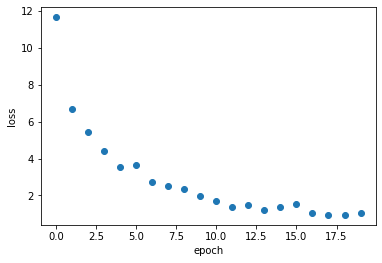

In [16]:
import matplotlib.pyplot as plt
plt.scatter(model.loss_hist.keys(),model.loss_hist.values())
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [17]:
from opensoundscape.torch.models.cnn import load_model
model = load_model('./multilabel_train_five_classes_aug_on/best.model')

In [18]:
prediction_dataset = model.train_dataset.sample(n=0)
prediction_dataset.augmentation_off()
prediction_dataset.df = test_df

In [19]:
valid_scores_df, valid_preds_df, valid_labels_df = model.predict(prediction_dataset,
                                                                 binary_preds='single_target',
                                                                 batch_size=16,
                                                                 num_workers=2,
                                                                 activation_layer='softmax')

(368, 6)


In [20]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print(classification_report(valid_labels_df, valid_preds_df))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        15
           2       0.92      0.97      0.94       148
           3       0.94      1.00      0.97        16
           4       0.99      1.00      0.99        91
           5       0.97      0.86      0.91        98

   micro avg       0.95      0.95      0.95       368
   macro avg       0.80      0.80      0.80       368
weighted avg       0.95      0.95      0.95       368
 samples avg       0.95      0.95      0.95       368



/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
fpr, tpr, thresh = roc_curve(valid_labels_df['Flycatcher'],  valid_scores_df['Flycatcher'])
auc = roc_auc_score(valid_labels_df['Flycatcher'],  valid_preds_df['Flycatcher'])

fpr2, tpr2, thresh2 = roc_curve(valid_labels_df['Piha'],  valid_scores_df['Piha'])
auc2 = roc_auc_score(valid_labels_df['Piha'],  valid_preds_df['Piha'])

fpr3, tpr3, thresh3 = roc_curve(valid_labels_df['Antbird'],  valid_scores_df['Antbird'])
auc3 = roc_auc_score(valid_labels_df['Antbird'],  valid_preds_df['Antbird'])

fpr4, tpr4, thresh4 = roc_curve(valid_labels_df['Attila'],  valid_scores_df['Attila'])
auc4 = roc_auc_score(valid_labels_df['Attila'],  valid_preds_df['Attila'])

fpr5, tpr5, thresh5 = roc_curve(valid_labels_df['Peppershrike'],  valid_scores_df['Peppershrike'])
auc5 = roc_auc_score(valid_labels_df['Peppershrike'],  valid_preds_df['Peppershrike'])

fpr6, tpr6, thresh6 = roc_curve(valid_labels_df['None'],  valid_scores_df['None'])
auc6 = roc_auc_score(valid_labels_df['None'],  valid_preds_df['None'])

plt.plot(fpr,tpr,label="AUC Flycatcher"+str(auc))
plt.plot(fpr2,tpr2,label="AUC Piha"+str(auc2))
plt.plot(fpr3,tpr3,label="AUC Antbird"+str(auc3))
plt.plot(fpr4,tpr4,label="AUC Attila"+str(auc4))
plt.plot(fpr5,tpr5,label="AUC Peppershrike"+str(auc5))
plt.plot(fpr6,tpr6,label="AUC None"+str(auc6))
# plt.title('Prediction on peru dataset (Train: microfaune)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

/home/shreyas/miniconda3/envs/opensoundscape/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.